In [18]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/2f/fd/9fcbe7fe94150e72d87120cbc462bde1971c3674e726b81f4a4c4fdfa8e1/scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl (8.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
folktables 0.0.12 requires pandas, which is not installed.
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn import datasets  
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt 
%matplotlib inline

import random as rand
#from imblearn.over_sampling import SMOTE

# Import Data

In [2]:
#import data
np.random.seed(13)
data = pd.read_csv('heart.csv') # Load in the downloaded csv file 


In [3]:
#Data
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#Check N/A
missing_values = data.isna().sum()
missing_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
#Check data type
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
#Extract Y and X
Y=pd.DataFrame(data['HeartDisease'])

In [7]:
X=data.drop('HeartDisease', axis=1)

In [8]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


# EDA


In [9]:
#EDA
categorical_columns=X.select_dtypes(include=['object']).columns.tolist()
numeric_columns=X.select_dtypes(include=['int']).columns.tolist()



[Text(0.5, 1.0, 'Correlation Matrix')]

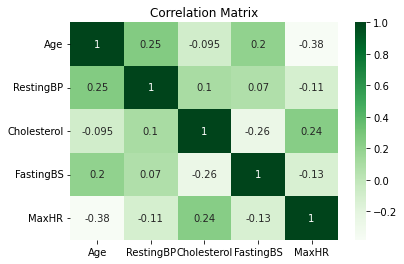

In [10]:
#Feature relationship
X_numeric=X[numeric_columns]
crr_matrix=X_numeric.corr()

#plotting correlation matrix 
sns.heatmap(crr_matrix, cmap="Greens", annot=True).set(title='Correlation Matrix')

In [16]:
# Here we can see that the correlation between each numeric feature is low, which means the variables do not have a strong linear relationship among them.

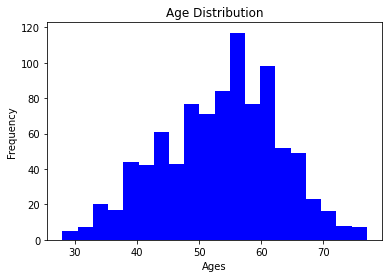

In [11]:
#Visualize each feature

##Age
plt.hist(X['Age'],bins=20, color='blue')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

[Text(0.5, 1.0, 'Sex Distribution')]

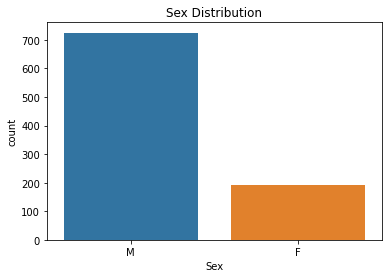

In [12]:
##Sex
sns.countplot(x='Sex', data=X).set(title='Sex Distribution')


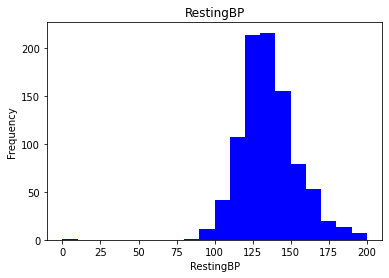

In [13]:
##RestingBP
plt.hist(X['RestingBP'],bins=20, color='blue')
plt.xlabel('RestingBP')
plt.ylabel('Frequency')
plt.title('RestingBP')
plt.show()

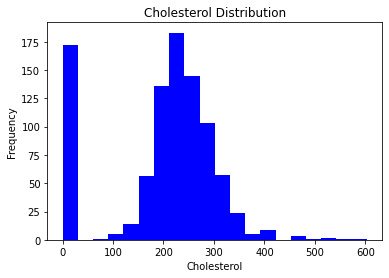

In [14]:
##Cholesterol
plt.hist(X['Cholesterol'],bins=20, color='blue')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution')
plt.show()

[Text(0.5, 1.0, 'FastingBS Distribution')]

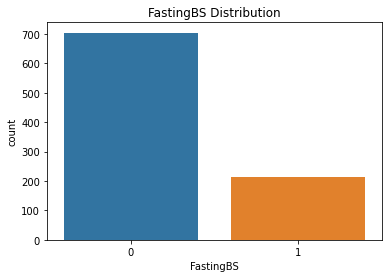

In [15]:
##FastingBS
sns.countplot(x='FastingBS', data=X).set(title='FastingBS Distribution')


[Text(0.5, 1.0, 'ChestPainType Distribution')]

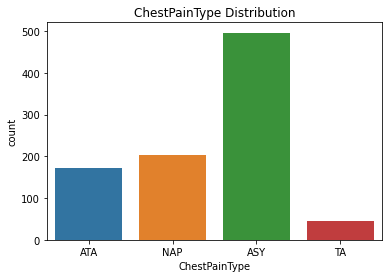

In [22]:
##ChestPainType
sns.countplot(x='ChestPainType', data=X).set(title='ChestPainType Distribution')


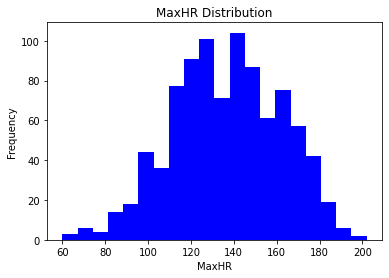

In [23]:
##MaxHR
plt.hist(X['MaxHR'],bins=20, color='blue')
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.title('MaxHR Distribution')
plt.show()

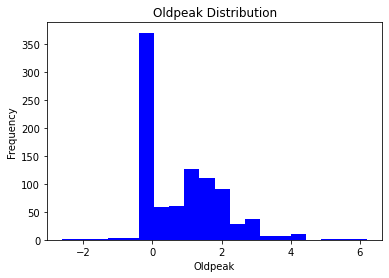

In [24]:
##Oldpeak
plt.hist(X['Oldpeak'],bins=20, color='blue')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.title('Oldpeak Distribution')
plt.show()


[Text(0.5, 1.0, 'ExerciseAngina Distribution')]

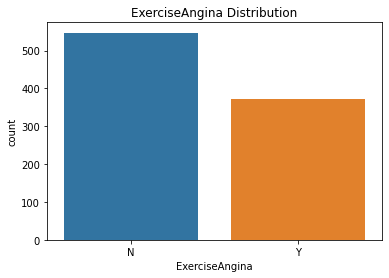

In [25]:
##ExerciseAngina
sns.countplot(x='ExerciseAngina', data=X).set(title='ExerciseAngina Distribution')


[Text(0.5, 1.0, 'RestingECG Distribution')]

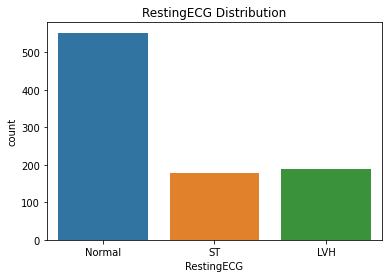

In [26]:
##RestingECG
sns.countplot(x='RestingECG', data=X).set(title='RestingECG Distribution')


[Text(0.5, 1.0, 'ST_Slope Distribution')]

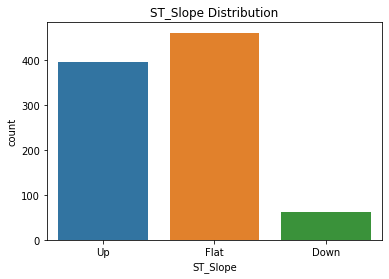

In [27]:
##ST_Slope
sns.countplot(x='ST_Slope', data=X).set(title='ST_Slope Distribution')

# Convert and Extract feature space

In [21]:
#Convert and Extract feature space
## From the table above we can see that there are several categorical features, we would use one-hot encoding and convert them to numeric feature

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(X[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_encoded = pd.concat([X, one_hot_df], axis=1)
X_encoded = X_encoded.drop(categorical_columns, axis=1)
#Add offset term
X_encoded['offset']=1

In [22]:
#Encoded X
X_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,offset
0,40,140,289,0,172,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,49,160,180,0,156,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,37,130,283,0,98,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
3,48,138,214,0,108,1.5,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,54,150,195,0,122,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
914,68,144,193,1,141,3.4,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
915,57,130,131,0,115,1.2,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
916,57,130,236,0,174,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [45]:
#Check samples balance
Y_1,Y_0= (Y==1).sum(),(Y==0).sum()

In [46]:
Y_1,Y_0
##We can see that the dataset is sligthly unbalanced, but we are not sure if it would affect the performance
##So at this point we will just go ahead and split the train/validation set

(HeartDisease    508
 dtype: int64,
 HeartDisease    410
 dtype: int64)

# Split train and test

In [23]:
# train:test = 2:8
t = int(0.8 * len(data))
train_x= X_encoded.iloc[0:t]
train_y=Y[:t]

test_x=X_encoded.iloc[t:len(data)]
test_y=Y[t:len(data)]



In [24]:
train_x.shape,test_x.shape

((734, 21), (184, 21))

# SVM

In [25]:
#Build Model
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_SVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_SVM.fit(train_x, train_y)

#Predict the response for test dataset
pred_y = clf_SVM.predict(test_x)


/Users/lynn/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
#Model Evaluation
# Model Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("Precision:",metrics.precision_score(test_y, pred_y))
print("Recall:",metrics.recall_score(test_y, pred_y))
print("MSE:",metrics.mean_squared_error(test_y, pred_y))

Accuracy: 0.7663043478260869
Precision: 0.7471264367816092
Recall: 0.7558139534883721
MSE: 0.23369565217391305


In [ ]:
#According to the metrics above, the SVM model performs ok.

In [ ]:
#Curse of dimensionality?

## SVM with PCA

In [42]:
#Reduce Dimentionality by PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
train_x_pca=pca.fit_transform(train_x)
test_x_pca=pca.fit_transform(test_x)

In [43]:
#train pcs_x
clf_SVM_PCA = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the pca training sets
clf_SVM_PCA.fit(train_x_pca,train_y)

#Predict the response for pca test dataset
pred_y_pca = clf_SVM_PCA.predict(test_x_pca)


/Users/lynn/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
#Evaluate SVM with PCA
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, pred_y_pca))
print("Precision:",metrics.precision_score(test_y, pred_y_pca))
print("Recall:",metrics.recall_score(test_y, pred_y_pca))
print("MSE:",metrics.mean_squared_error(test_y, pred_y_pca))

Accuracy: 0.717391304347826
Precision: 0.6634615384615384
Recall: 0.8023255813953488
MSE: 0.2826086956521739


In [ ]:
#It seems like PCA doesn't help

# SVM with SMOTE

In [53]:
#Let's see if we can improve the model by SMOTE(upsampling)
from imblearn.over_sampling import SMOTE

In [54]:
# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_encoded, Y)

In [59]:
X_resampled.shape,y_resampled.shape

((1016, 21), (1016, 1))

In [60]:
#Check samples balance
y_resampled_1,y_resampled_0= (y_resampled==1).sum(),(y_resampled==0).sum()

In [61]:
y_resampled_1,y_resampled_0

(HeartDisease    508
 dtype: int64,
 HeartDisease    508
 dtype: int64)

In [70]:
#retrain SVM with upsampling data
t = int(0.8 * len(X_resampled))

#Split train/test set
train_x_SMOTE= X_resampled.iloc[0:t]
train_y_SMOTE=y_resampled[:t]

test_x_SMOTE=X_resampled.iloc[t:len(data)]
test_y_SMOTE=y_resampled[t:len(data)]

In [71]:
train_x_SMOTE.shape,test_x_SMOTE.shape

((812, 21), (106, 21))

In [72]:
#Build Model
#Import svm model

#Create a svm Classifier
clf_SMOTE = svm.SVC(kernel='linear')

#Train the model using the training sets
clf_SMOTE.fit(train_x_SMOTE, train_y_SMOTE)

#Predict the response for test dataset
pred_y_SMOTE = clf_SMOTE.predict(test_x_SMOTE)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
print("Accuracy:",metrics.accuracy_score(test_y_SMOTE, pred_y_SMOTE))
print("Precision:",metrics.precision_score(test_y_SMOTE, pred_y_SMOTE))
print("Recall:",metrics.recall_score(test_y_SMOTE, pred_y_SMOTE))
print("MSE:",metrics.mean_squared_error(test_y_SMOTE, pred_y_SMOTE))

Accuracy: 0.7641509433962265
Precision: 0.7708333333333334
Recall: 0.7254901960784313
MSE: 0.2358490566037736


In [ ]:
#SMOTE/upsampling help a bit but not much...

In [83]:
#Let's try different kernels (with SMOTE)
#rbf

#Build Model
#Create a svm Classifier with rbf
clf_rbf = svm.SVC(kernel='rbf')

#Train the model
clf_rbf.fit(train_x_SMOTE, train_y_SMOTE)

#Predict the response
pred_y_rbf = clf_rbf.predict(test_x_SMOTE)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
print("Accuracy:",metrics.accuracy_score(test_y_SMOTE, pred_y_rbf))
print("Precision:",metrics.precision_score(test_y_SMOTE, pred_y_rbf))
print("Recall:",metrics.recall_score(test_y_SMOTE, pred_y_rbf))
print("MSE:",metrics.mean_squared_error(test_y_SMOTE, pred_y_rbf))

Accuracy: 0.6509433962264151
Precision: 0.8181818181818182
Recall: 0.35294117647058826
MSE: 0.3490566037735849


In [85]:
#polu

#Build Model
#Create a svm Classifier with poly
clf_poly = svm.SVC(kernel='poly')#default=3

#Train the model
clf_poly.fit(train_x_SMOTE, train_y_SMOTE)

#Predict the response
pred_y_poly = clf_poly.predict(test_x_SMOTE)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
print("Accuracy:",metrics.accuracy_score(test_y_SMOTE, pred_y_poly))
print("Precision:",metrics.precision_score(test_y_SMOTE, pred_y_poly))
print("Recall:",metrics.recall_score(test_y_SMOTE, pred_y_poly))
print("MSE:",metrics.mean_squared_error(test_y_SMOTE, pred_y_poly))

Accuracy: 0.6981132075471698
Precision: 0.8275862068965517
Recall: 0.47058823529411764
MSE: 0.3018867924528302


In [89]:
#sigmoid
#Create a svm Classifier with sigmoid
clf_sigmoid = svm.SVC(kernel='sigmoid')

#Train the model
clf_sigmoid.fit(train_x_SMOTE, train_y_SMOTE)

#Predict the response
pred_y_sigmoid = clf_sigmoid.predict(test_x_SMOTE)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
print("Accuracy:",metrics.accuracy_score(test_y_SMOTE, pred_y_sigmoid))
print("Precision:",metrics.precision_score(test_y_SMOTE, pred_y_sigmoid))
print("Recall:",metrics.recall_score(test_y_SMOTE, pred_y_sigmoid))
print("MSE:",metrics.mean_squared_error(test_y_SMOTE, pred_y_sigmoid))

Accuracy: 0.46226415094339623
Precision: 0.4423076923076923
Recall: 0.45098039215686275
MSE: 0.5377358490566038


# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [108]:
#Build Model
Log_Reg_Model=LogisticRegression(random_state=3,fit_intercept=False).fit(train_x,train_y)

pred_y_Log=Log_Reg_Model.predict(test_x)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y_Log))
print("Precision:",metrics.precision_score(test_y, pred_y_Log))
print("Recall:",metrics.recall_score(test_y, pred_y_Log))
print("MSE:",metrics.mean_squared_error(test_y, pred_y_Log))

Accuracy: 0.7771739130434783
Precision: 0.7710843373493976
Recall: 0.7441860465116279
MSE: 0.22282608695652173


In [114]:
Log_Reg_Model.coef_

array([[ 0.00368693,  0.00521696, -0.00465028,  1.41998329, -0.00779146,
         0.30968617, -0.53483156,  0.57291288,  1.08094522, -0.79924832,
        -0.2807986 ,  0.03718301,  0.18145818, -0.0442088 , -0.09916807,
        -0.32452472,  0.36260603, -0.04742113,  1.44228599, -1.35678355,
         0.03808131]])

# Logistic Regression with SMOTE

In [112]:
#Build Model
Log_Reg_Model_SMOTE=LogisticRegression(random_state=3,fit_intercept=False).fit(train_x_SMOTE,train_y_SMOTE)

pred_y_Log_SMOTE=Log_Reg_Model_SMOTE.predict(test_x_SMOTE)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
print("Accuracy:",metrics.accuracy_score(test_y_SMOTE, pred_y_Log_SMOTE))
print("Precision:",metrics.precision_score(test_y_SMOTE, pred_y_Log_SMOTE))
print("Recall:",metrics.recall_score(test_y_SMOTE, pred_y_Log_SMOTE))
print("MSE:",metrics.mean_squared_error(test_y_SMOTE, pred_y_Log_SMOTE))

Accuracy: 0.7547169811320755
Precision: 0.7777777777777778
Recall: 0.6862745098039216
MSE: 0.24528301886792453


# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=3)
rf_classifier.fit(train_x.iloc[:,0:len(train_x)-1], train_y)
pred_y_rf = rf_classifier.predict(test_x.iloc[:,0:len(test_x)-1])

/var/folders/pd/3hyd2qns29j6sxj974y3s0nc0000gn/T/ipykernel_63854/3333651078.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(train_x.iloc[:,0:len(train_x)-1], train_y)


In [130]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y_rf))
print("Precision:",metrics.precision_score(test_y, pred_y_rf))
print("Recall:",metrics.recall_score(test_y, pred_y_rf))
print("MSE:",metrics.mean_squared_error(test_y, pred_y_rf))

Accuracy: 0.7934782608695652
Precision: 0.7790697674418605
Recall: 0.7790697674418605
MSE: 0.20652173913043478


## Random Forest with SMOTE(Upsampling)

In [132]:
rf_classifier_SMOTE = RandomForestClassifier(n_estimators=100, random_state=3)
rf_classifier_SMOTE.fit(train_x_SMOTE.iloc[:,0:len(train_x_SMOTE)-1], train_y_SMOTE)
pred_y_rf_SMOTE = rf_classifier_SMOTE.predict(test_x_SMOTE.iloc[:,0:len(test_x)-1])

/var/folders/pd/3hyd2qns29j6sxj974y3s0nc0000gn/T/ipykernel_63854/3042160150.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_SMOTE.fit(train_x_SMOTE.iloc[:,0:len(train_x_SMOTE)-1], train_y_SMOTE)


In [134]:
print("Accuracy:",metrics.accuracy_score(test_y_SMOTE, pred_y_rf_SMOTE))
print("Precision:",metrics.precision_score(test_y_SMOTE, pred_y_rf_SMOTE))
print("Recall:",metrics.recall_score(test_y_SMOTE, pred_y_rf_SMOTE))
print("MSE:",metrics.mean_squared_error(test_y_SMOTE, pred_y_rf_SMOTE))

Accuracy: 0.8207547169811321
Precision: 0.8076923076923077
Recall: 0.8235294117647058
MSE: 0.1792452830188679


In [ ]:
#It seems like we got greater Accuracy, Precision, recall rate here.

In [135]:
# Add number of trees
rf_classifier_SMOTE_200 = RandomForestClassifier(n_estimators=200, random_state=3)
rf_classifier_SMOTE_200.fit(train_x_SMOTE.iloc[:,0:len(train_x_SMOTE)-1], train_y_SMOTE)
pred_y_rf_SMOTE_200 = rf_classifier_SMOTE_200.predict(test_x_SMOTE.iloc[:,0:len(test_x)-1])

/var/folders/pd/3hyd2qns29j6sxj974y3s0nc0000gn/T/ipykernel_63854/1418412465.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_SMOTE_200.fit(train_x_SMOTE.iloc[:,0:len(train_x_SMOTE)-1], train_y_SMOTE)


In [136]:
print("Accuracy:",metrics.accuracy_score(test_y_SMOTE, pred_y_rf_SMOTE_200))
print("Precision:",metrics.precision_score(test_y_SMOTE, pred_y_rf_SMOTE_200))
print("Recall:",metrics.recall_score(test_y_SMOTE, pred_y_rf_SMOTE_200))
print("MSE:",metrics.mean_squared_error(test_y_SMOTE, pred_y_rf_SMOTE_200))

Accuracy: 0.8207547169811321
Precision: 0.8076923076923077
Recall: 0.8235294117647058
MSE: 0.1792452830188679


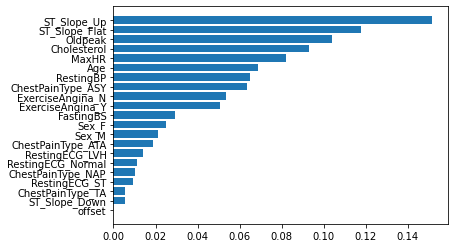

In [143]:
features = train_x_SMOTE.columns
f_i = list(zip(features,rf_classifier_SMOTE_200.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [151]:
from sklearn.feature_selection import RFECV

rfe = RFECV(rf_classifier_SMOTE_200,cv=3,scoring="neg_mean_squared_error")

rfe.fit(train_x_SMOTE.iloc[:,0:len(train_x_SMOTE)-1],train_y_SMOTE)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Library/Frameworks/Python.framework/

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Library/Frameworks/Python.framework/

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Library/Frameworks/Python.framework/

RFECV(cv=3, estimator=RandomForestClassifier(n_estimators=200, random_state=3),
      scoring='neg_mean_squared_error')

In [152]:
pred_y_rfe = rfe.predict(test_x_SMOTE.iloc[:,0:len(test_x)-1])
print("Accuracy:",metrics.accuracy_score(test_y_SMOTE, pred_y_rfe))
print("Precision:",metrics.precision_score(test_y_SMOTE, pred_y_rfe))
print("Recall:",metrics.recall_score(test_y_SMOTE, pred_y_rfe))
print("MSE:",metrics.mean_squared_error(test_y_SMOTE, pred_y_rfe))


Accuracy: 0.7924528301886793
Precision: 0.7735849056603774
Recall: 0.803921568627451
MSE: 0.20754716981132076
